<a href="https://colab.research.google.com/github/Ashika-A/data-science/blob/main/Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install kaggle                #Importing kaggle library to colab python

! mkdir ~/.kaggle                   #Make a kaggle directory in Colab

! cp kaggle.json ~/.kaggle/         #Copy the uploaded kaggle.json to this kaggle directory in colab

! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! kaggle datasets download -d saurabhshahane/ecommerce-text-classification

 76% 6.00M/7.86M [00:00<00:00, 61.6MB/s]
100% 7.86M/7.86M [00:00<00:00, 75.3MB/s]


In [5]:
! unzip /content/ecommerce-text-classification.zip

Archive:  /content/ecommerce-text-classification.zip
  inflating: ecommerceDataset.csv    


In [6]:
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv('ecommerceDataset.csv')

In [ ]:
df

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
...,...,...
50419,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50420,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50421,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50422,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [8]:
df.columns

Index(['Household', 'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and s

In [9]:
df.columns=['label','text']

In [10]:
df

,label,text
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
...,...,...
50419,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50420,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50421,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50422,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [11]:
df['label'].value_counts()

Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: label, dtype: int64

In [12]:
df['label_number']=df['label'].map({'Household':0,'Books':1,'Electronics':2,'Clothing & Accessories':3})

In [13]:
df.columns

Index(['label', 'text', 'label_number'], dtype='object')

In [14]:
df

,label,text,label_number
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0
3,Household,Incredible Gifts India Wooden Happy Birthday U...,0
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,0
...,...,...,...
50419,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...,2
50420,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...,2
50421,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...,2
50422,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...",2


In [ ]:
df.sample(2)

,label,text,label_number
42761,Electronics,Logitech K480 Multi-Device Bluetooth Keyboard ...,2
39575,Clothing & Accessories,Matelco Womens Woollen Grey Stripes Buttoned C...,3


In [15]:
df=df.drop(columns=['label'],axis=1)

In [16]:
df=df.dropna()

In [17]:
df.head()

,text,label_number
0,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0
1,SAF 'UV Textured Modern Art Print Framed' Pain...,0
2,"SAF Flower Print Framed Painting (Synthetic, 1...",0
3,Incredible Gifts India Wooden Happy Birthday U...,0
4,Pitaara Box Romantic Venice Canvas Painting 6m...,0


In [18]:
X=df['text']
y=df['label_number']

In [19]:
X.isna().sum()

0

In [20]:
y.isna().sum()

0

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=2023,stratify=df['label_number'])

In [22]:
X_train.shape

(40338,)

In [23]:
X_test.shape

(10085,)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
model = Pipeline([('step1',TfidfVectorizer()),('step2',MultinomialNB())])

In [26]:
model.fit(X_train,y_train)

Pipeline(steps=[('step1', TfidfVectorizer()), ('step2', MultinomialNB())])

In [27]:
y_pred=model.predict(X_test)

In [28]:
y_pred

array([0, 3, 2, ..., 0, 2, 1])

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3863
           1       0.97      0.93      0.95      2364
           2       0.97      0.90      0.93      2124
           3       0.98      0.93      0.96      1734

    accuracy                           0.94     10085
   macro avg       0.96      0.93      0.94     10085
weighted avg       0.95      0.94      0.94     10085



In [49]:
new=['the book']
ypred=model.predict(new)
ypred

array([1])

In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3792,   19,   36,   16],
       [ 148, 2188,   15,   13],
       [ 179,   33, 1910,    2],
       [ 107,    5,    5, 1617]])

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
model = Pipeline([('step1',TfidfVectorizer()),('step2', RandomForestClassifier())])

In [38]:
model.fit(X_train,y_train)

Pipeline(steps=[('step1', TfidfVectorizer()),
                ('step2', RandomForestClassifier())])

In [39]:
y_pred=model.predict(X_test)
y_pred

array([0, 3, 2, ..., 0, 2, 1])

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3863
           1       0.98      0.98      0.98      2364
           2       0.99      0.94      0.96      2124
           3       0.99      0.97      0.98      1734

    accuracy                           0.97     10085
   macro avg       0.98      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085



In [42]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3816,   18,   21,    8],
       [  47, 2306,    4,    7],
       [ 107,   22, 1990,    5],
       [  40,    7,    3, 1684]])

Text(95.72222222222221, 0.5, 'Truth')

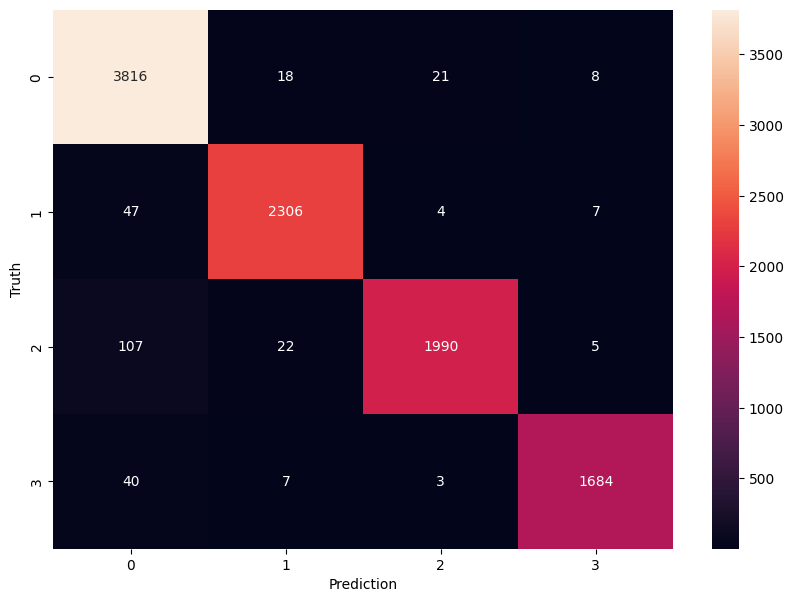

In [43]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
model = Pipeline([('step1',TfidfVectorizer()),('step2', LogisticRegression())])

In [46]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('step1', TfidfVectorizer()), ('step2', LogisticRegression())])

In [50]:
y_pred=model.predict(X_test)
y_pred

array([0, 3, 2, ..., 0, 2, 1])

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3863
           1       0.98      0.96      0.97      2364
           2       0.97      0.94      0.96      2124
           3       0.98      0.98      0.98      1734

    accuracy                           0.97     10085
   macro avg       0.97      0.96      0.97     10085
weighted avg       0.97      0.97      0.97     10085



In [53]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3797,   15,   32,   19],
       [  71, 2270,   18,    5],
       [  88,   32, 2000,    4],
       [  25,   11,    7, 1691]])

In [57]:
new_data=["This Samsung mobile of expensive"]
y_pred=model.predict(new_data)
y_pred

array([2])

In [ ]:
new=["this dress is pretty"]
ypred=model.predict(new)
ypred

In [ ]:
new1=["this book shelf"]
ypred=model.predict(new1)
ypred

array([1])

In [ ]:
new2=["Krishna is the hero of mahabharata"]
ypred=model.predict(new2)
ypred

array([1])